<a href="https://colab.research.google.com/github/toche7/DSEssentials/blob/main/DemoPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Principle Component Analysis (PCA)

PCA (Principal Component Analysis) หรือ การวิเคราะห์องค์ประกอบหลัก เป็นเทคนิคทางสถิติที่ใช้ในการลดขนาดของข้อมูล โดยการแปลงชุดของตัวแปรที่มีความสัมพันธ์กันจำนวนมาก ให้เป็นชุดของตัวแปรใหม่ที่มีความสัมพันธ์กันน้อยลง ซึ่งเรียกว่า "องค์ประกอบหลัก" (Principal Components) โดยที่องค์ประกอบหลักเหล่านี้จะยังคงรักษาความแปรปรวน (variance) ของข้อมูลต้นฉบับไว้ให้ได้มากที่สุด

**ทำไมต้องใช้ PCA?**

* ลดความซับซ้อนของข้อมูล:
เมื่อมีจำนวนตัวแปรมากเกินไป อาจทำให้วิเคราะห์และทำความเข้าใจข้อมูลได้ยาก PCA จะช่วยลดจำนวนตัวแปรลง ทำให้ข้อมูลจัดการได้ง่ายขึ้น
* ช่วยในการแสดงภาพข้อมูล (Data Visualization): การลดมิติข้อมูลเหลือ 2 หรือ 3 มิติ จะช่วยให้สามารถพล็อตข้อมูลและเห็นรูปแบบหรือการรวมกลุ่มของข้อมูลได้ชัดเจนขึ้น
* ลดเวลาในการประมวลผล: การใช้จำนวนตัวแปรที่น้อยลงในการวิเคราะห์หรือสร้างแบบจำลอง จะช่วยลดเวลาในการคำนวณ

## Data generation

### Subtask:
Generate or load a suitable dataset for demonstrating PCA.


**Reasoning**:
Import necessary libraries and generate a synthetic dataset using make_blobs, then store it in a pandas DataFrame.



In [1]:
import pandas as pd
from sklearn.datasets import make_blobs

# Generate a synthetic dataset
n_samples = 300
n_features = 3
centers = 3
cluster_std = 1.5

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=centers, cluster_std=cluster_std, random_state=42)

# Store the data in a pandas DataFrame
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(n_features)])

# Display the first few rows of the DataFrame
display(df.head())

,feature_0,feature_1,feature_2
0,3.550559,-8.144945,-9.250487
1,-1.538454,9.203428,1.793813
2,1.361297,-6.487193,-6.861890
3,-8.513036,7.986698,2.397666
4,-8.072883,7.086371,3.232190


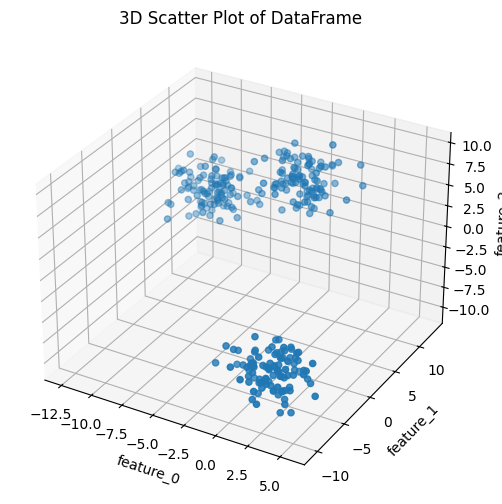

In [6]:
# prompt: show 3D scatter of df

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['feature_0'], df['feature_1'], df['feature_2'])

ax.set_xlabel('feature_0')
ax.set_ylabel('feature_1')
ax.set_zlabel('feature_2')
ax.set_title('3D Scatter Plot of DataFrame')

plt.show()


## Data preprocessing

### Subtask:
Preprocess the data (e.g., scaling) if necessary for PCA.


**Reasoning**:
Scale the data using StandardScaler and store the scaled data in a new DataFrame while retaining column names.



In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
display(df_scaled.head())

,feature_0,feature_1,feature_2
0,1.426103,-1.558049,-1.777933
1,0.351906,0.824690,0.336628
2,0.963990,-1.330362,-1.320608
3,-1.120301,0.657577,0.452243
4,-1.027393,0.533920,0.612022


## Apply pca

### Subtask:
Apply PCA to the preprocessed data.


**Reasoning**:
Apply PCA to the scaled data and store the result in a new DataFrame.



In [3]:
from sklearn.decomposition import PCA

# Instantiate a PCA object, keeping 2 components
pca = PCA(n_components=2)

# Fit the PCA model to the scaled data
pca.fit(df_scaled)

# Transform the scaled data
df_pca = pca.transform(df_scaled)

# Store the transformed data in a new DataFrame with clear column names
df_pca = pd.DataFrame(df_pca, columns=['Principal Component 1', 'Principal Component 2'])

# Display the first few rows of the transformed data
display(df_pca.head())

,Principal Component 1,Principal Component 2
0,-2.754331,-0.037506
1,0.521190,0.680370
2,-2.102052,-0.156587
3,1.255626,-0.558366
4,1.226500,-0.441415


## Visualize and explain pca

### Subtask:
Visualize the results of PCA and explain the concepts and results of PCA.


**Reasoning**:
Create a scatter plot of the PCA-transformed data, title it, label the axes, and display it.



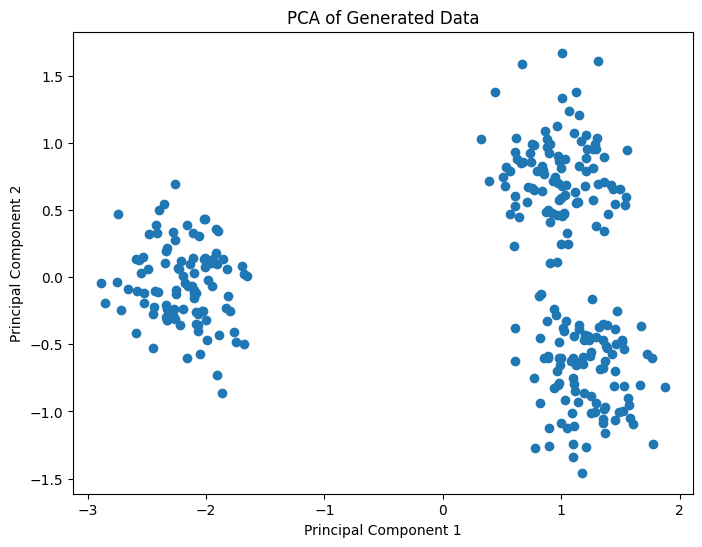

In [4]:
import matplotlib.pyplot as plt

# Create a scatter plot of the PCA-transformed data
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['Principal Component 1'], df_pca['Principal Component 2'])

# Title and label the plot
plt.title('PCA of Generated Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Display the plot
plt.show()

**Reasoning**:
Explain the scatter plot in the context of PCA.



## Summary:

### Data Analysis Key Findings

*   A synthetic dataset with 300 samples and 3 features was successfully generated and stored in a pandas DataFrame.
*   The generated data was effectively scaled using `StandardScaler`, preparing it for PCA.
*   PCA was successfully applied to the scaled data, reducing the dimensionality to 2 principal components, which were stored in a new DataFrame.
*   A scatter plot of the PCA-transformed data was generated, visually representing the data in the reduced 2D space.
*   An explanation of PCA concepts and the interpretation of the scatter plot was provided.

### Insights or Next Steps

*   The visualization suggests potential clustering in the data, which could be further investigated using clustering algorithms on the PCA-transformed data.
*   Analyzing the explained variance ratio from the PCA object would provide insight into how much of the original data's variance is captured by the first two principal components.
